Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [30]:
import json 
import pandas as pd

import os

### saved my result as CSV and now using it.

In [31]:
filtered_df= pd.read_csv('../data/Bikes.csv', index_col=0)

In [32]:
df_yelp= pd.read_csv('../data/Yelp.csv', index_col=0)

### since there is a code for getting the POI, I wanted to make sure there aren't other categories in between the results that i got.

In [33]:
# Filter out parks and landmarks from df_yelp
other_categories_yelp = df_yelp[df_yelp['categories']
                                .str.contains('Landmarks', case=False, regex=True)]

# renaming the relevant columns for clarity
other_categories_table_yelp = other_categories_yelp[['station_name',
                                                      'name', 'categories']].copy()
other_categories_table_yelp.columns = ['Nearest Station', 
                                       'Venue Name', 'Category']


print(other_categories_table_yelp)

         Nearest Station                            Venue Name  \
4          Place Islande                                 imada   
37       Parking Broglie                Opéra National du Rhin   
40       Parking Broglie    Chambre de Commerce et d'Industrie   
48       Parking Broglie                     Maison Kammerzell   
92    Parking Austerlitz    Chambre de Commerce et d'Industrie   
101   Parking Austerlitz                     Maison Kammerzell   
102   Parking Austerlitz                   Quais des Bateliers   
103   Parking Austerlitz                      Monumento Goethe   
107   Parking Austerlitz                Quai du Général Koenig   
108        Koenigshoffen  Cimetière israélite de Koenigshoffen   
124   Gare de Strasbourg             La Passerelle des Moulins   
160               Centre    Chambre de Commerce et d'Industrie   
168               Centre                      Monumento Goethe   
171               Centre                     Pont Saint-Martin   
172       

In [34]:
#filltering categories to see what else we have 

other_categories_yelp = df_yelp[~df_yelp['categories'].str
                                .contains('Parks|Bar|Pub', case=False, regex=True)]

# renaming the columns for clarity
other_categories_table_yelp = other_categories_yelp[['station_name',
                                                      'name', 'categories']].copy()
other_categories_table_yelp.columns = ['Nearest Station', 
                                       'Venue Name', 'Category']


print(other_categories_table_yelp)

         Nearest Station                            Venue Name  \
4          Place Islande                                 imada   
24       Parking Broglie                 Café Bar de l'Odyssée   
37       Parking Broglie                Opéra National du Rhin   
40       Parking Broglie    Chambre de Commerce et d'Industrie   
48       Parking Broglie                     Maison Kammerzell   
92    Parking Austerlitz    Chambre de Commerce et d'Industrie   
101   Parking Austerlitz                     Maison Kammerzell   
102   Parking Austerlitz                   Quais des Bateliers   
103   Parking Austerlitz                      Monumento Goethe   
107   Parking Austerlitz                Quai du Général Koenig   
108        Koenigshoffen  Cimetière israélite de Koenigshoffen   
124   Gare de Strasbourg             La Passerelle des Moulins   
152               Centre                 Café Bar de l'Odyssée   
160               Centre    Chambre de Commerce et d'Industrie   
168       

### Renaming the categories becuse some had very long names.

In [35]:
#renaming the categories becuse some had very long names

def simplify_category_name(category):
    category_lower = category.lower()
    if 'bar' in category_lower or 'pub' in category_lower:
        return 'Bar/Pub'
    elif 'cafe' in category_lower:
        return 'Cafe'
    elif 'park' in category_lower:
        return 'Park'
    elif 'landmark' in category_lower:
        return 'Landmark'
    else:
        return category


df_yelp['simplified_categories'] = df_yelp['categories'].apply(simplify_category_name)
df_yelp

,name,station_name,categories,simplified_categories
0,The Irish Pub,Place Islande,Pubs,Bar/Pub
1,Mezzanine of London,Place Islande,"Bars, Dance Clubs, Tapas Bars",Bar/Pub
2,Spyl,Place Islande,"Dance Clubs, Bars",Bar/Pub
3,Le Barômètre,Place Islande,"Bars, Brasseries, Bistros",Bar/Pub
4,imada,Place Islande,Landmarks & Historical Buildings,Landmark
...,...,...,...,...
267,Fiesta Makassi Bar,Gare Nord,"Sports Bars, Cocktail Bars",Bar/Pub
268,La Solidarité,Gare Nord,"French, Bars",Bar/Pub
269,Le Garde Fou,Gare Nord,Pubs,Bar/Pub
270,Brasserie WOW,Gare Nord,"Bars, Brasseries",Bar/Pub


### Merging the DataFrames on 'Station Name' from filtered_df and 'station_name' from df_yelp

In [36]:

# Merging the DataFrames on 'Station Name' from filtered_df and 'station_name' from df_yelp
merged_df = pd.merge(filtered_df, df_yelp, left_on='Station Name',
                      right_on='station_name', how='left')

# Dropping the 'station_name' column from df_yelp, since it's redundant
merged_df.drop('station_name', axis=1, inplace=True)

merged_df.head(5)

,Station Name,Latitude,Longitude,Available Bikes,name,categories,simplified_categories
0,Place Islande,48.580314,7.776203,3,The Irish Pub,Pubs,Bar/Pub
1,Place Islande,48.580314,7.776203,3,Mezzanine of London,"Bars, Dance Clubs, Tapas Bars",Bar/Pub
2,Place Islande,48.580314,7.776203,3,Spyl,"Dance Clubs, Bars",Bar/Pub
3,Place Islande,48.580314,7.776203,3,Le Barômètre,"Bars, Brasseries, Bistros",Bar/Pub
4,Place Islande,48.580314,7.776203,3,imada,Landmarks & Historical Buildings,Landmark


### saved my result as CSV

In [37]:
df=merged_df.to_csv('../data/merged.csv')

### chechikng for duplication

In [38]:
duplicates_all = merged_df.duplicated()
print(f"Are there any duplicates (considering all columns)? 
      {duplicates_all.any()}")

Are there any duplicates (considering all columns)? False


### looking for nulls

In [39]:
merged_df.isnull().any()

Station Name             False
Latitude                 False
Longitude                False
Available Bikes          False
name                      True
categories                True
simplified_categories     True
dtype: bool

In [54]:
null_counts = merged_df.isnull().sum()
null_counts


Station Name              0
Latitude                  0
Longitude                 0
Available Bikes           0
name                     11
categories               11
simplified_categories    11
dtype: int64

In [55]:
# Filtering the DataFrame to only include rows with at least one null value
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]

# Displaying the first 11 rows of the filtered DataFrame
rows_with_nulls.head(11)


,Station Name,Latitude,Longitude,Available Bikes,name,categories,simplified_categories
58,Hohwart,48.549190,7.740754,0,NaN,NaN,NaN
63,Hoenheim Gare,48.628353,7.760103,0,NaN,NaN,NaN
111,Campus d'Illkirch,48.529616,7.734226,1,NaN,NaN,NaN
114,Espace Européen de l'Entreprise,48.612597,7.711630,0,NaN,NaN,NaN
179,Ostwald Hôtel de Ville,48.551032,7.711200,0,NaN,NaN,NaN
217,Boutique Mobile : Vendenheim,48.667930,7.710083,0,NaN,NaN,NaN
243,Boutique Mobile : Illkirch,48.527624,7.709340,0,NaN,NaN,NaN
244,Boutique Mobile : Eckbolsheim,48.578579,7.688021,0,NaN,NaN,NaN
245,Boutique Mobile : Eschau,48.489717,7.714668,0,NaN,NaN,NaN
246,Boutique Mobile : Geispolsheim,48.515063,7.658834,0,NaN,NaN,NaN


### droping null as they do'nt play a significant effect 

In [59]:
# Droping rows with any null values directly in `merged_df`
merged_df.dropna(inplace=True)


In [60]:
merged_df.isnull().any()

Station Name             False
Latitude                 False
Longitude                False
Available Bikes          False
name                     False
categories               False
simplified_categories    False
dtype: bool

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 
### checking for distribution of Available Bikes at Stations

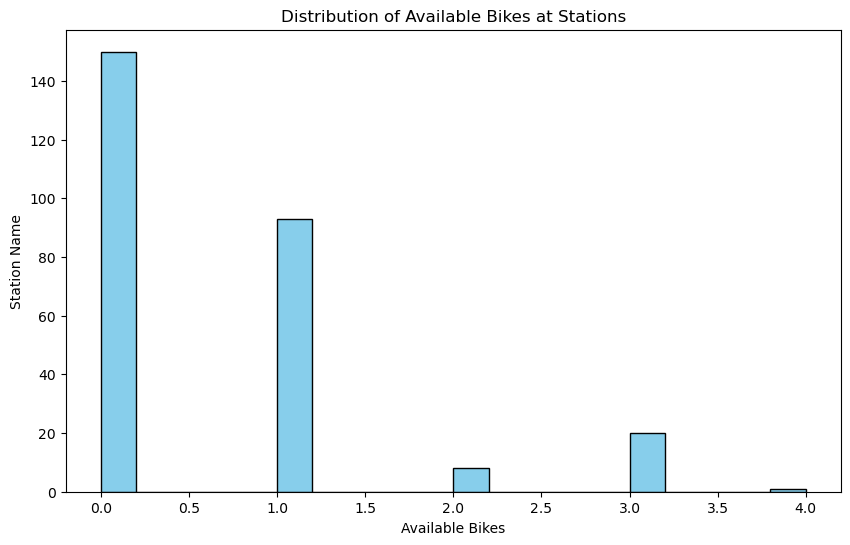

In [61]:
#Distribution of Available Bikes at Stations
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Available Bikes'], bins=20, 
         color='skyblue', edgecolor='black')
plt.title('Distribution of Available Bikes at Stations')
plt.xlabel('Available Bikes')
plt.ylabel('Station Name')
plt.show()

### checking for the most common types of venues near bike stations.

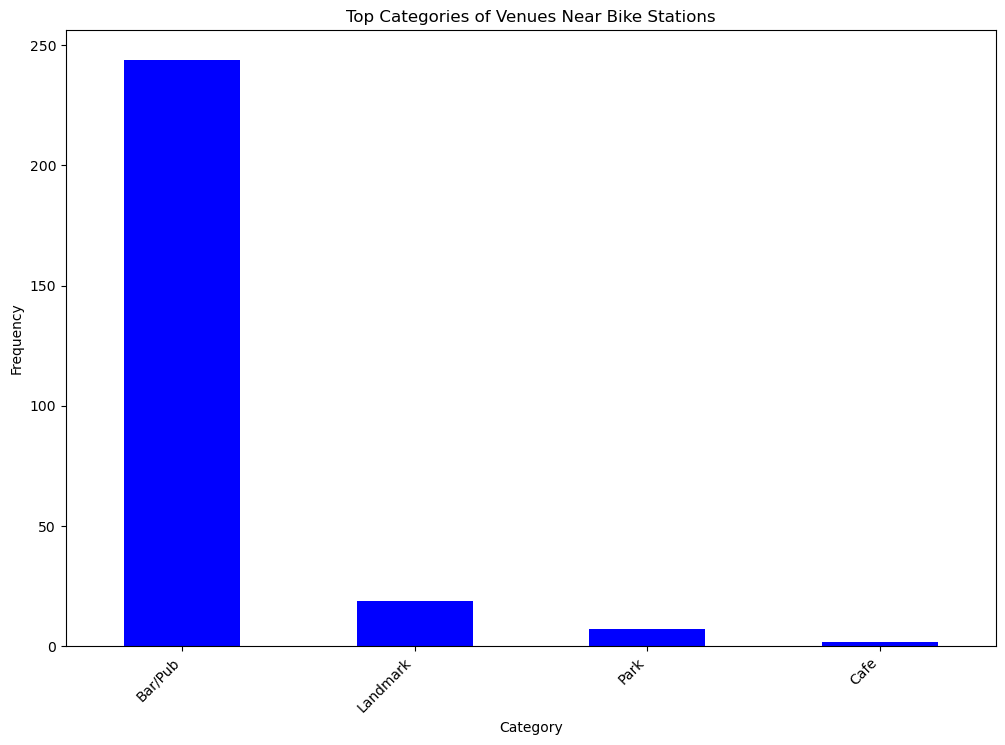

In [62]:
# the most common types of venues near bike stations.

top_categories = merged_df['simplified_categories'].value_counts().head(10)  # Adjust the number to display top N categories
plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar', color='blue')
plt.title('Top Categories of Venues Near Bike Stations')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### checking to see what categorie are arounf each station

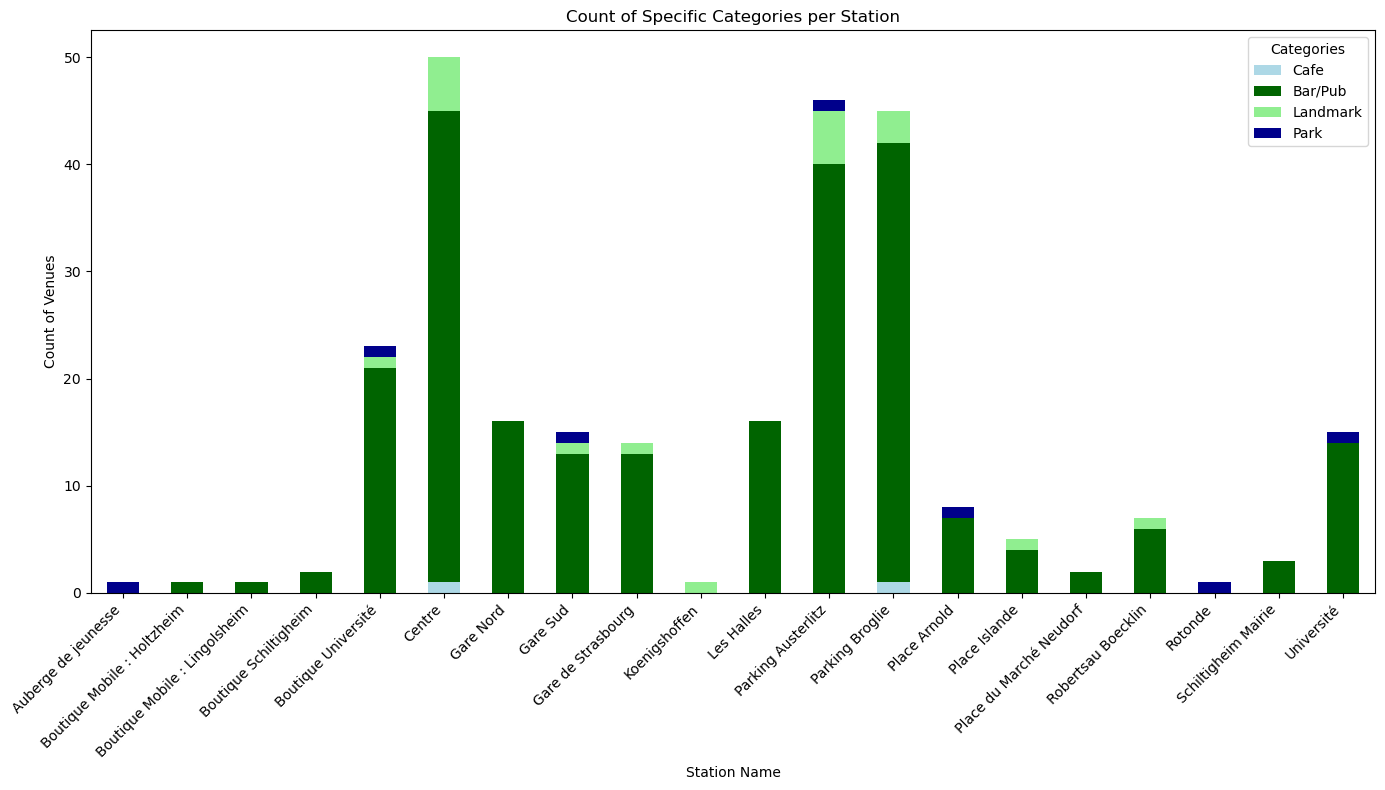

In [42]:
#what categorie are arounf each station
category_colors = {
    'Cafe': 'lightblue',
    'Bar/Pub': 'darkgreen',
    'Landmark': 'lightgreen',
    'Park': 'darkblue'  
}

category_counts_per_station = merged_df.groupby(['Station Name',
                                                  'simplified_categories']).size().unstack(fill_value=0)

category_counts_per_station = category_counts_per_station.reindex(columns=['Cafe', 
                                                                           'Bar/Pub', 'Landmark', 'Park'])


category_counts_per_station.plot(kind='bar', stacked=True, figsize=(14, 8), 
                                 color=[category_colors.get(x) 
                                        for x in category_counts_per_station.columns])
plt.title('Count of Specific Categories per Station')
plt.xlabel('Station Name')
plt.ylabel('Count of Venues')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categories')
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

### Puting all the results in an SQLite3 database
#### 1- creating a table for each 
#### 2- inserting data for each

In [43]:
import sqlite3
from sqlite3 import Error

In [44]:
df_foursquare=pd.read_csv('/Users/asalzooashkiany/Documents/Statistical-Modelling-Project/notebooks/foursquare_data.csv')

In [45]:
import sqlite3
from sqlite3 import Error

#the path to the database
database_path = '/Users/asalzooashkiany/Documents/Statistical-Modelling-Project/data/project_data.db'

# Creating a database connection
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Connection to the database established at {db_file}")
    except Error as e:
        print(e)
    return conn

# Creatig a connection object using the specified path
conn = create_connection(database_path)


Connection to the database established at /Users/asalzooashkiany/Documents/Statistical-Modelling-Project/data/project_data.db


In [46]:
def create_table_stations(conn):
    try:
        cur = conn.cursor()
        cur.execute('''
            CREATE TABLE IF NOT EXISTS Stations (
                "Station Name" TEXT PRIMARY KEY,
                "Latitude" REAL,
                "Longitude" REAL,
                "Available Bikes" INTEGER
            );
        ''')
        print("Table 'Stations' created successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

if conn is not None:
    create_table_stations(conn)
else:
    print("Error! cannot create the database connection.")


Table 'Stations' created successfully


In [47]:
def insert_station_data(conn, data):
    """
    Insert station data into the Stations table.
    :param conn: Connection object
    :param data: DataFrame containing the data to insert
    """
    try:
        cur = conn.cursor()
        for index, row in data.iterrows():
            sql = ''' INSERT INTO Stations("Station Name",
              "Latitude", "Longitude", "Available Bikes")
                      VALUES(?,?,?,?) '''
            cur.execute(sql, (row['Station Name'],
                               row['Latitude'], row['Longitude'], row['Available Bikes']))
        conn.commit()
        print("Station data inserted successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

insert_station_data(conn, filtered_df)


The error 'UNIQUE constraint failed: Stations.Station Name' occurred


In [48]:
def create_table_foursquare(conn):
    try:
        cur = conn.cursor()
        cur.execute('''
            CREATE TABLE IF NOT EXISTS Foursquare (
                "Name" TEXT,
                "Station_Name" TEXT,
                "categories" TEXT,
                FOREIGN KEY ("Station_Name") REFERENCES Stations("Station Name")
            );
        ''')
        print("Table 'Foursquare' created successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

if conn is not None:
    create_table_foursquare(conn)

Table 'Foursquare' created successfully


In [49]:
def insert_foursquare_data(conn, data):
    """
    Insert Foursquare venue data.
    """
    try:
        cur = conn.cursor()
        for index, row in data.iterrows():
            sql = ''' INSERT INTO Foursquare("Name",
              "Station_Name", "categories")
                      VALUES(?,?,?) '''
            cur.execute(sql, (row['name'],
                               row['station_name'], row['categories']))
        conn.commit()
        print("Foursquare data inserted successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

insert_foursquare_data(conn, df_foursquare)

Foursquare data inserted successfully


In [50]:
def create_table_yelp(conn):
    """
    Create the Yelp table without a primary key, including a foreign key.
    """
    try:
        cur = conn.cursor()
        cur.execute('''
            CREATE TABLE IF NOT EXISTS Yelp (
                "Name" TEXT,
                "Station_Name" TEXT,
                "Categories" TEXT,
                FOREIGN KEY ("Station_Name") REFERENCES Stations("Station Name")
            );
        ''')
        conn.commit()
        print("Table 'Yelp' recreated successfully without a primary key")
    except Error as e:
        print(f"The error '{e}' occurred")

# Recreate the Yelp table
create_table_yelp(conn)

Table 'Yelp' recreated successfully without a primary key


In [51]:
def insert_yelp_data(conn, data):
    """
    Insert Yelp venue data into the Yelp table.
    :param conn: Database connection
    :param data: DataFrame containing Yelp data
    """
    try:
        cur = conn.cursor()
        for index, row in data.iterrows():
            # Prepare the SQL insert statement
            sql = '''INSERT INTO Yelp ("Name",
              "Station_Name", "Categories") VALUES (?, ?, ?);'''
            # Execute the SQL statement with values from the DataFrame row
            cur.execute(sql, (row['name'],
                               row['station_name'], row['categories']))
      
        conn.commit()
        print("Yelp data inserted successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


insert_yelp_data(conn, df_yelp)

Yelp data inserted successfully


### checking to see if the result have been inserted correctly

In [52]:


def fetch_yelp_entries_table(conn):
    """
    Fetch all entries from the Yelp table and display as a table using Pandas.
    :param conn: the Connection object
    """
    sql = 'SELECT * FROM Yelp'
    df = pd.read_sql_query(sql, conn)
    print(df)
    print(f"Total number of Yelp entries fetched: {len(df)}")

fetch_yelp_entries_table(conn)



                         Name         Station_Name  \
0               The Irish Pub        Place Islande   
1         Mezzanine of London        Place Islande   
2                        Spyl        Place Islande   
3                Le Barômètre        Place Islande   
4                       imada        Place Islande   
..                        ...                  ...   
811        Fiesta Makassi Bar            Gare Nord   
812             La Solidarité            Gare Nord   
813              Le Garde Fou            Gare Nord   
814             Brasserie WOW            Gare Nord   
815  Le Jardin des Deux Rives  Auberge de jeunesse   

                           Categories  
0                                Pubs  
1       Bars, Dance Clubs, Tapas Bars  
2                   Dance Clubs, Bars  
3           Bars, Brasseries, Bistros  
4    Landmarks & Historical Buildings  
..                                ...  
811        Sports Bars, Cocktail Bars  
812                      French

In [53]:


def fetch_data_as_dataframe(conn, query):
    """
    Execute a query and return the results as a pandas DataFrame.
    :param conn: the Connection object
    :param query: SQL query to execute
    """
    return pd.read_sql_query(query, conn)


sql_query = '''
SELECT s."Station Name", s.Latitude,
 s.Longitude, s."Available Bikes", 
       y.Name, y.Categories
FROM Stations s
INNER JOIN Yelp y ON s."Station Name" = y.Station_Name
'''

df = fetch_data_as_dataframe(conn, sql_query)
df

,Station Name,Latitude,Longitude,Available Bikes,Name,Categories
0,Place Islande,48.580314,7.776203,3,The Irish Pub,Pubs
1,Place Islande,48.580314,7.776203,3,Mezzanine of London,"Bars, Dance Clubs, Tapas Bars"
2,Place Islande,48.580314,7.776203,3,Spyl,"Dance Clubs, Bars"
3,Place Islande,48.580314,7.776203,3,Le Barômètre,"Bars, Brasseries, Bistros"
4,Place Islande,48.580314,7.776203,3,imada,Landmarks & Historical Buildings
...,...,...,...,...,...,...
811,Gare Nord,48.585644,7.735371,0,Fiesta Makassi Bar,"Sports Bars, Cocktail Bars"
812,Gare Nord,48.585644,7.735371,0,La Solidarité,"French, Bars"
813,Gare Nord,48.585644,7.735371,0,Le Garde Fou,Pubs
814,Gare Nord,48.585644,7.735371,0,Brasserie WOW,"Bars, Brasseries"
